In this notebook, I will also try and build the following:
- A **Regressor** that can, to a certain degree, predict the revenue of a particular movie.
- A **Classifier** that identifies if a movie will be a hit or will make the producers lose money.

## Importing Libraries and Loading Our Data 

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
# plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


## Understanding the Dataset

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features
* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id**: The ID of the move.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## Data Preprocessing 

In [6]:
df = df.drop(['imdb_id'], axis=1)

In [7]:
df[df['original_title'] != df['title']][['title', 'original_title']]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal
...,...,...
45453,Mom,Maa
45455,St. Michael Had a Rooster,San Michele aveva un gallo
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal


In [8]:
df = df.drop('original_title', axis=1)

The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so

In [9]:
df[df['revenue'] == 0].shape

(38052, 22)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [10]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [11]:
df[df['adult'] != 'False']['budget']

19489                                   0
19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
28701                                   0
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
31934                                   0
32113                                   0
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
39901                                   0
39902                                   0
40574                                   0
41009                              750000
43090                                   0
Name: budget, dtype: object

The **budget** feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df[df['adult'] != 'False']['budget']

19489         0.0
19730         NaN
28701         0.0
29503         NaN
31934         0.0
32113         0.0
35587         NaN
39901         0.0
39902         0.0
40574         0.0
41009    750000.0
43090         0.0
Name: budget, dtype: float64

In [13]:
df['budget'] = df['budget'].replace(0, np.nan)
df[df['adult'] != 'False']['budget']

19489         NaN
19730         NaN
28701         NaN
29503         NaN
31934         NaN
32113         NaN
35587         NaN
39901         NaN
39902         NaN
40574         NaN
41009    750000.0
43090         NaN
Name: budget, dtype: float64

In [14]:
df[df['budget'].isnull()].shape

(36576, 22)

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:

- **year**: The year in which the movie was released.
- **return**: The ratio of revenue to budget.

The **return** feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a $200 million budget movie that earned $100 million did better than a $50,000 budget movie taking in $200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [15]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

We have close to **5000 movies** for which we have data on revenue and budget ratio. This is close to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [16]:
df['year2'] = df['release_date'].apply(lambda x :str(x).split('-')[0] if x != np.nan else np.nan)

In [17]:
df.year2.unique()

array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', 'nan', '1948',
       '1943', '1950', '1987', '1973', '1956', '1958', '1949', '1972',
       '1953', '1998', '1933', '2010', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1963', '1942', '1941', '1939', '1947',
       '1946', '1945', '1938', '1935', '1936', '1926', '1932', '1979',
       '1971', '1986', '2013', '1978', '1966', '1962', '1983', '1984',
       '1931', '1922', '1999', '1927', '1929', '1930', '1928', '2012',
       '1925', '2000', '1919', '1923', '1920', '1918', '1921', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

In [18]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [19]:
df.year.nunique()

136

 Before split 'release_date' values by '-', you have to change 'release_date' column's datetype to datetime using pd.to_datetime method to change values which are not datetime formating to NaT by force. 

In [20]:
df = df.drop('year2', axis=1)

In [21]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are close to **10 adult movies** in this dataset. The **adult** feature therefore is not of much use to us and can be safely dropped.

In [22]:
df= df.drop('adult', axis=1)

In [23]:
df.poster_path.isnull().sum()

386

In [24]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

## Exploratory Data Analysis

### # Titel and Overview Wordclouds

In [25]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [26]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

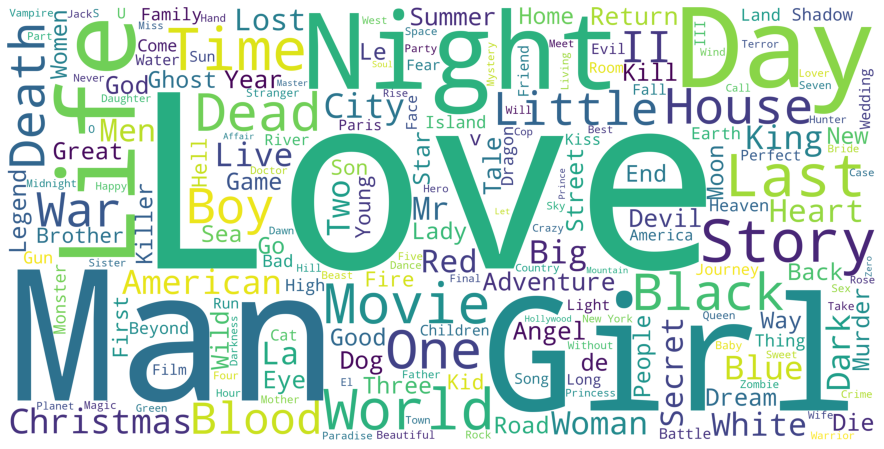

In [27]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

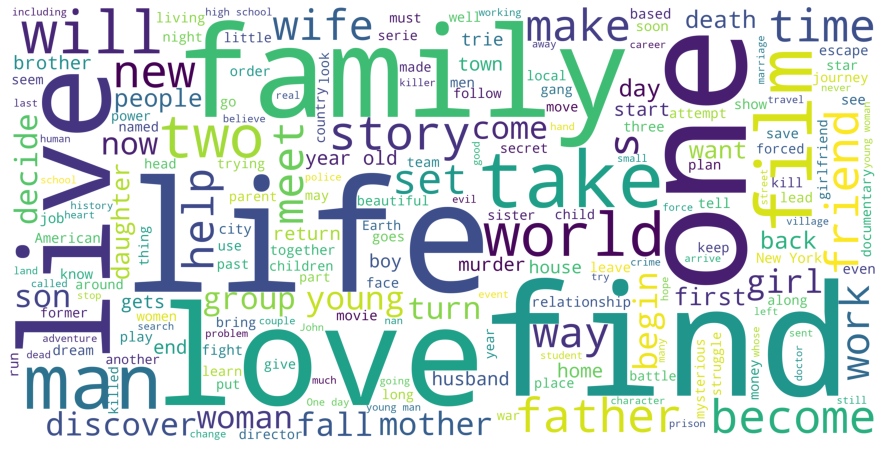

In [28]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### # Production Countries

In [29]:
print(df['production_countries'].isnull().sum())
df['production_countries']

3


0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [30]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [31]:
df['production_countries'].isnull().sum()

0

In [32]:
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['production_countries']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45466, dtype: object

In [33]:
s = df.apply(lambda x : pd.Series(x['production_countries']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'
s

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: countries, Length: 49423, dtype: object

In [34]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'return', 'year', 'countries'],
      dtype='object')

In [35]:
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df

,countries
United States of America,21153
United Kingdom,4094
France,3940
Germany,2254
Italy,2169
...,...
Honduras,1
Myanmar,1
Martinique,1
Somalia,1


In [36]:
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [42]:
con_df.head(20)

,num_movies,country
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India
10,596,Hong Kong


In [39]:
con_df = con_df[con_df['country'] != 'United States of America']

In [40]:
data = [ dict(type = 'choropleth',
       locations = con_df['country'],
       locationmode = 'country names',
       z = con_df['num_movies'],
       text = con_df['country'],
       colorscale=[[0, 'rgb(255, 255, 255)'],
                   [1, 'rgb(255, 0, 0)']],
       autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict(
                color = 'rgb(100,100,100)',
                width = 0.5
            )),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
        )]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
        
        

### # Franchise Movies

In [47]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection']

0        {'id': 10194, 'name': 'Toy Story Collection', ...
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
4        {'id': 96871, 'name': 'Father of the Bride Col...
9        {'id': 645, 'name': 'James Bond Collection', '...
12       {'id': 117693, 'name': 'Balto Collection', 'po...
                               ...                        
45355    {'id': 37261, 'name': 'The Carry On Collection...
45358    {'id': 37261, 'name': 'The Carry On Collection...
45369    {'id': 37261, 'name': 'The Carry On Collection...
45371    {'id': 477208, 'name': 'DC Super Hero Girls Co...
45382    {'id': 200641, 'name': 'Red Lotus Collection',...
Name: belongs_to_collection, Length: 4494, dtype: object

In [48]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x : x['name'] if isinstance(x, dict) else np.nan)
df_fran['belongs_to_collection']

0                  Toy Story Collection
2             Grumpy Old Men Collection
4        Father of the Bride Collection
9                 James Bond Collection
12                     Balto Collection
                      ...              
45355           The Carry On Collection
45358           The Carry On Collection
45369           The Carry On Collection
45371    DC Super Hero Girls Collection
45382              Red Lotus Collection
Name: belongs_to_collection, Length: 4494, dtype: object

In [49]:
df_fran['belongs_to_collection'].isnull().sum()

3

In [50]:
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [51]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()
fran_pivot

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0
...,...,...,...,...
1690,Сказки Чуковского,0,NaN,0.0
1691,Чебурашка и крокодил Гена,0,NaN,0.0
1692,Что Творят мужчины! (Коллекция),0,NaN,0.0
1693,男はつらいよ シリーズ,0,NaN,0.0


**Highest Grossing Movie Franchises**

In [52]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


**Most Successful Movie Franchises (by Average Gross)**

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [53]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


**Longest Running Franchises**

In [54]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


### # Production Companies

In [55]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                   []
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [56]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
s

0              Pixar Animation Studios
1                     TriStar Pictures
1                         Teitler Film
1            Interscope Communications
2                         Warner Bros.
                     ...              
45460      20th Century Fox Television
45460    CanWest Global Communications
45462                      Sine Olivia
45463          American World Pictures
45464                        Yermoliev
Name: companies, Length: 70545, dtype: object

In [60]:
type(s)

pandas.core.series.Series

In [71]:
# print(df['production_companies'].stack())
# pd.Series(df['production_companies']).stack()
#  'Series' object has no attribute 'stack'
df.apply(lambda x: pd.Series(x['production_companies']),axis=1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TriStar Pictures,Teitler Film,Interscope Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Warner Bros.,Lancaster Gate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twentieth Century Fox Film Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sandollar Productions,Touchstone Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45462,Sine Olivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45463,American World Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45464,Yermoliev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df['production_companies'].stack()
# print(type(pd.Series(df['production_companies'])))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
#### will continue
#### tomorrow
########## again and again